# CARDIO VASCULAR DISEASE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cardio_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
data = data.drop(columns = 'id') #drop id column
data.isna().sum()                #check for NA vals in data
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data['age'].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

### here the age is given in days so we should convert it to years


In [5]:
data['age'] = round(data['age'] / 365)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


#### using correlation plot to findout what variables effects the Outcome the most

<AxesSubplot:>

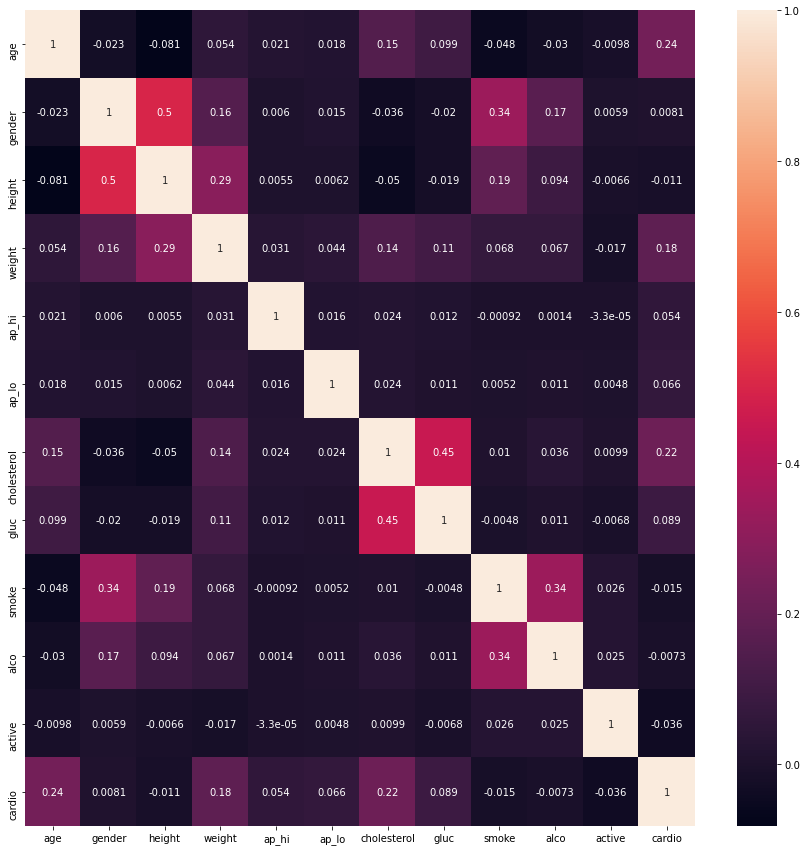

In [6]:
corr = data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot = True ,ax=ax)

### Based on the correlation matrix the target variable mostly depends on Age, Weight, cholestrol, glucose , blood pressures

In [7]:
data.drop(columns = ['gender', 'smoke', 'alco', 'active'])

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,50.0,168,62.0,110,80,1,1,0
1,55.0,156,85.0,140,90,3,1,1
2,52.0,165,64.0,130,70,3,1,1
3,48.0,169,82.0,150,100,1,1,1
4,48.0,156,56.0,100,60,1,1,0
...,...,...,...,...,...,...,...,...
69995,53.0,168,76.0,120,80,1,1,0
69996,62.0,158,126.0,140,90,2,2,1
69997,52.0,183,105.0,180,90,3,1,1
69998,61.0,163,72.0,135,80,1,2,1


In [8]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## OUTLIER DETECTION AND CLEANING

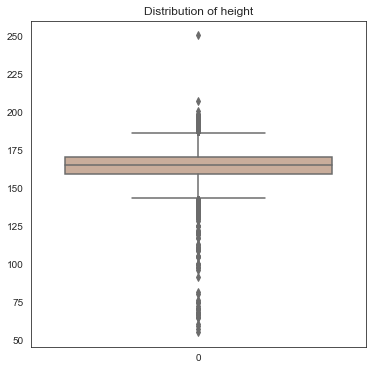

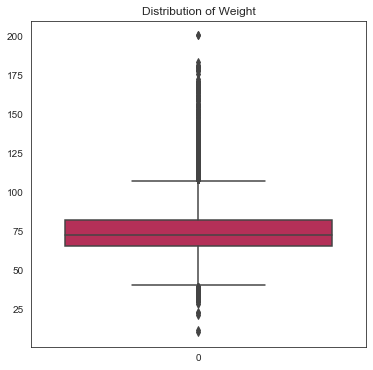

In [9]:
sns.set_style('white')
plt.figure(figsize=(6,6))
sns.boxplot(data = data.height, palette = 'pink')
plt.title('Distribution of height');
plt.figure(figsize=(6,6))
sns.boxplot(data = data.weight,palette='rocket_r')
plt.title('Distribution of Weight');

In [10]:
data = data[(data['height']<250) & (data['weight']>30.0)]

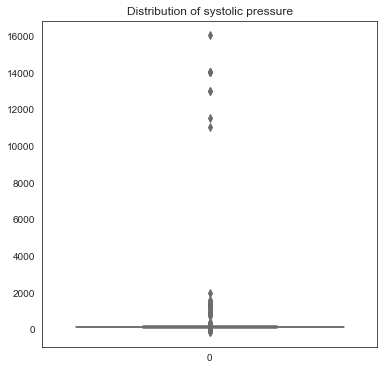

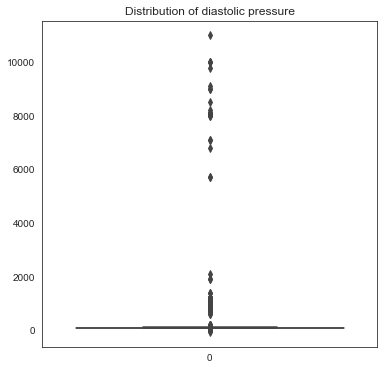

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(data = data.ap_hi, palette = 'pink')
plt.title('Distribution of systolic pressure');
plt.figure(figsize=(6,6))
sns.boxplot(data = data.ap_lo,palette='rocket_r')
plt.title('Distribution of diastolic pressure');

here the systolic and dia stolic pressures are way too off in some cases clearly blood pressures cant be over 200 so we need to ignore that values.

In [12]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

combining the height and weight as a single variable by calculating BMI

In [13]:
data["bmi"] = (data["weight"]/ (data["height"]/100)**2)
data[data['bmi']>100].sort_values(by='weight').tail(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
47352,64.0,1,75,75.0,120,80,1,1,0,0,1,0,133.333333
53344,56.0,2,67,80.0,120,80,1,1,0,0,0,1,178.213411
22723,64.0,1,55,81.0,130,90,1,1,0,0,1,1,267.768595
16699,54.0,2,74,98.0,140,90,1,1,0,0,1,1,178.962747
23913,52.0,1,81,156.0,140,90,1,1,0,0,1,0,237.768633
6153,58.0,1,122,161.0,120,80,1,1,0,0,1,1,108.169847
59625,48.0,1,104,165.0,120,80,1,1,0,0,1,0,152.551775
12770,54.0,1,75,168.0,120,80,1,1,1,0,1,1,298.666667
8171,48.0,2,97,170.0,160,100,1,1,1,0,1,1,180.678074
27384,42.0,1,80,178.0,140,90,3,3,0,0,1,1,278.125000


In [14]:
data.drop(columns= ['height', 'weight'],inplace = True) #drop height and weight because we have bmi anyway

In [15]:
data = data[(data['bmi'] > 10) & (data['bmi']<100)]

### dealing with categorical variables

here cholestrol and gluc are categorical values so we need to encode then by using dummy encoding

In [16]:
cholesterol_dummies = pd.get_dummies(data['cholesterol'], prefix = 'cholesterol')
gluc_dummies = pd.get_dummies(data['gluc'], prefix = 'gluc')
data = pd.concat([data, cholesterol_dummies,gluc_dummies], axis=1)
data.drop(['cholesterol','gluc'],axis=1,inplace=True)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, svm
from sklearn.ensemble import RandomForestClassifier

### MODEL BUILDING AND TRAINING

In [18]:
x = data.drop('cardio', axis = 1)
y = data['cardio']

scaler= StandardScaler()
scaler.fit(x[['age', 'ap_hi','ap_lo','bmi']])
x[['age', 'ap_hi','ap_lo','bmi']] = scaler.transform(x[['age', 'ap_hi','ap_lo','bmi']])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2, random_state= 0)

LOGISTIC REGRESSION

In [19]:
LR = LogisticRegression().fit(x_train,y_train)
LR.score(x_test,y_test)

0.7253627569528416

KNN

In [20]:
KNN = KNeighborsClassifier().fit(x_train,y_train)
KNN.score(x_test,y_test)

0.68863361547763

RANDOM FOREST CLASSIFIER

In [21]:
RFC= RandomForestClassifier().fit(x_train,y_train)
RFC.score(x_test,y_test)

0.6783555018137848

### PREDICTION DATA CLEANING

In [22]:
pred_df = pd.DataFrame({'age':[25],'gender':[1],'height' : [158],'weight' : [59],'ap_hi' : [130], 'ap_lo' : [70],'cholesterol' : [1],'gluc' : [89],'smoke' : [1], 'alco' : [0], 'active' : [0]})

The data used previously for training has the glucose as a categorical value but in the prediction data we have it as absolute value so we need to convert it into categorical data for that gluc_level function is written

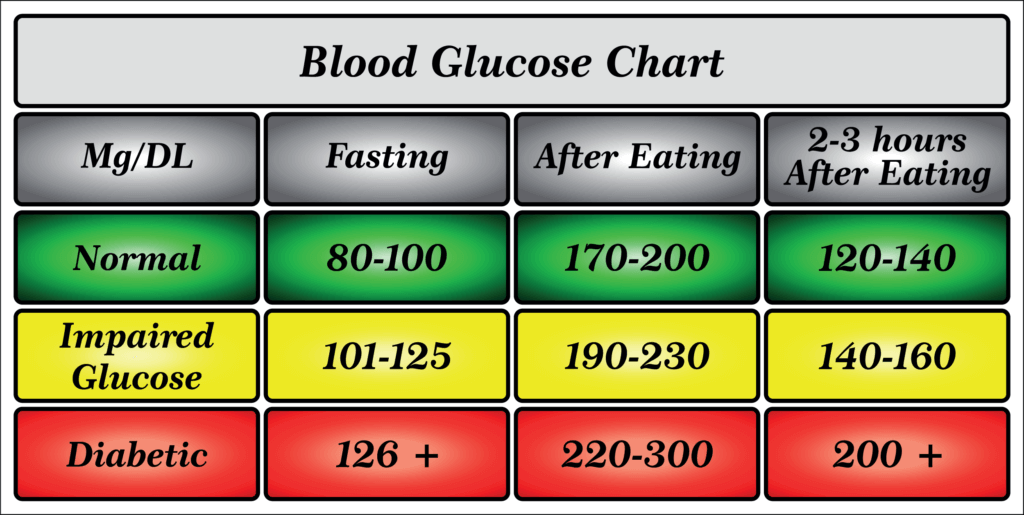

In [23]:
def gluc_level(x):
    if x in range (80,100):
        x = 1
    elif x in range (100,125):
        x = 2
    elif x>125 :
        x = 3
    return x

In [24]:
pred_df['gluc'] = pred_df['gluc'].apply(gluc_level)

In [25]:
pred_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,25,1,158,59,130,70,1,1,1,0,0


In [26]:
x.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,-0.496470,2,-1.124089,-0.140924,0,0,1,-1.047397,1,0,0,1,0,0
1,0.243297,1,0.950648,1.049164,0,0,1,1.432270,0,0,1,1,0,0
2,-0.200563,1,0.259069,-1.331012,0,0,0,-0.752627,0,0,1,1,0,0
3,-0.792377,2,1.642227,2.239252,0,0,1,0.242770,1,0,0,1,0,0
4,-0.792377,1,-1.815668,-2.521100,0,0,0,-0.847644,1,0,0,1,0,0


we still need to create the dummy variables, calculate bmi for prediction data so for that the below function is used

In [27]:
def wrangle(df):
    df["bmi"] = (df["weight"]/ (df["height"]/100)**2)
    df.drop(columns= ['height', 'weight'],inplace = True)
    df.drop(columns = ['gender', 'smoke', 'alco', 'active'])
    cholesterol_dummies = pd.get_dummies(df['cholesterol'], prefix = 'cholesterol')
    gluc_dummies = pd.get_dummies(df['gluc'], prefix = 'gluc')
    df = pd.concat([df, cholesterol_dummies,gluc_dummies], axis=1)
    df.drop(['cholesterol','gluc'],axis=1,inplace=True)
    #the below snippet ensures that there willbe no columns missmatch between training and prediction data
    col = ['age', 'gender', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3']
    for i in col :
        if i not in df :
            df[i]= 0
    return df

In [28]:
pred_df = wrangle(pred_df)

out of all the linear regression algorithm has best accuracy so predictiong the iutcime using linear regression

In [29]:
cardio = LR.predict(pred_df)
print(cardio[0])

1
